# Pattern Recognition : CNN Example

We use the game library `pygame` to draw patterns on pictures.

`!pip install pygame`

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pygame
pygame.init()

pygame 2.1.0 (SDL 2.0.16, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


(5, 0)

## An example of drawing a picture

(128, 128, 3)


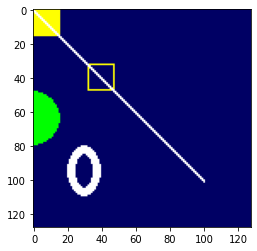

In [2]:
image_size = (128, 128)                                            # width and height of the image
canvas = pygame.Surface(image_size)                                # create canvas for the image
  
canvas.fill( (0,0,100) )                                           # fill canvas with color (R,G,B)
pygame.draw.rect   (canvas,  (255,255,  0), (0, 0, 16,16) )        # color, (x0,y0, w, h)          - fill rect
pygame.draw.rect   (canvas,  (255,255,  0), (32, 32, 16,16), 1 )   # color, (x0,y0, w, h), line    - rect
pygame.draw.circle (canvas,  (  0,255,  0), (64, 0), 16 )          # color, (x0,y0), r             - fill circle
pygame.draw.ellipse(canvas,  (255,255,255), (80,20, 30,20), 5)     # color  (x0,y0,w,h), line
pygame.draw.line   (canvas,  (255,255,255), (0, 0), (100,100), 2)  # colot, (x1,y1), (x2,y2), line - line

ar = pygame.surfarray.array3d(canvas)                              # get RGB-array
print(ar.shape)
plt.imshow(ar)
plt.show()

## Toy dataset

Let's create a set of pictures with four types of patterns on them.

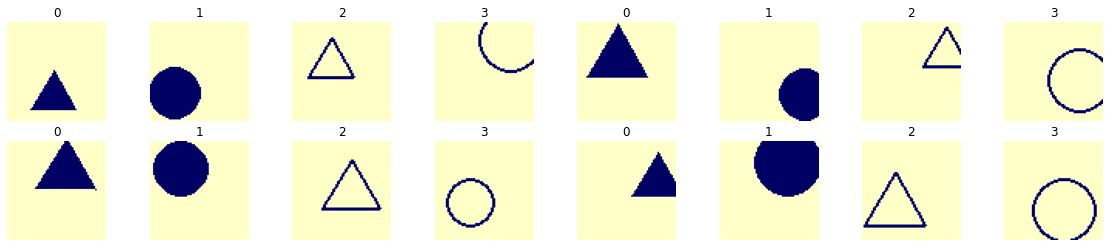

In [3]:
NUM_EXAMPLES = 1000                          # number of examples
NUM_CLASSES  = 4                             # number of pattern classes
TRAIN_RATE   = 0.8                           # relative proportion of examples for training

IMAGE_SIZE   = (64, 64)                      # width and height of the image
SHAPE_SIZE   = (16, 24)                      # minimal and maximal size of pattern
ROTATE       = False

canvas = pygame.Surface(IMAGE_SIZE)

def shape(n, x0, y0, r, line = None, color = (0,0,100)):
    """regular polygon with n vertices """
    if n < 3: n = 3
    phi0 = 2*np.pi/n
    phi  = phi0/2 if not ROTATE else np.random.rand()*np.pi
    
    points = []
    for i in range(n):
        points.append( (x0 + r*np.cos(phi), y0 + r*np.sin(phi)) )
        phi += phi0
    if line: pygame.draw.polygon(canvas, color, points, line)
    else:    pygame.draw.polygon(canvas, color, points)

def circle(x0, y0, r, line = None, color = (0,0,100)):
    """ filled or outline circle """
    if line: pygame.draw.circle(canvas, (0,0,100), (x0,y0), r, line)   
    else:    pygame.draw.circle(canvas, (0,0,100), (x0,y0), r)   

X, Y = [],[]
for example in range(NUM_EXAMPLES):           # generate examples
    canvas.fill( (255,255,200) )   
    
    r  = np.random.randint(SHAPE_SIZE[0], SHAPE_SIZE[1]) 
    x0 = np.random.randint(r//2, IMAGE_SIZE[0]-r//2)
    y0 = np.random.randint(r//2, IMAGE_SIZE[1]-r//2)    
    
    if    example % NUM_CLASSES == 0:    shape(3, x0,y0,r)
    elif  example % NUM_CLASSES == 1:    circle(  x0,y0,r)   
    elif  example % NUM_CLASSES == 2:    shape(3, x0,y0,r, 2)         
    elif  example % NUM_CLASSES == 3:    circle(  x0,y0,r, 2)
    elif  example % NUM_CLASSES == 4:    shape(4, x0,y0,r)                 
    elif  example % NUM_CLASSES == 5:    shape(4, x0,y0,r, 2)                 
    elif  example % NUM_CLASSES == 6:    shape(5, x0,y0,r)                 
    else:                                shape(5, x0,y0,r, 2)                 
        
    X.append(pygame.surfarray.array3d(canvas) )
    Y.append(example % NUM_CLASSES)

    
plt.figure(figsize=(20, 4))                   # plot the 16 examples
for i in range(16):    
    plt.subplot(2, 8, i+1)    
    plt.title(f"{Y[i]}")
    plt.imshow(X[i])
    plt.axis('off')
plt.show()    

## Create training and test dataset

- Normalize Pixels to [0...1]
- Rreorder the indexes by putting the channel first: `(N, w,h,c) -> (N, c,w,h)`

In [4]:
import torch
import torch.nn as nn

X,Y = np.array(X), np.array(Y)              # so faster creation of torch tensor

cnt_trn = int(len(X)*TRAIN_RATE)
X_trn = torch.tensor(X[:cnt_trn], dtype=torch.float32).permute(0, 3, 1, 2)/255.  # channel first
Y_trn = torch.tensor(Y[:cnt_trn], dtype=torch.int64)
X_tst = torch.tensor(X[cnt_trn:], dtype=torch.float32).permute(0, 3, 1, 2)/255.  # channel first
Y_tst = torch.tensor(Y[cnt_trn:], dtype=torch.int64)

print("X:", X_trn.shape, "  Y:", Y_trn.shape)
print(X_trn[1])

X: torch.Size([800, 3, 64, 64])   Y: torch.Size([800])
tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[0.7843, 0.7843, 0.7843,  ..., 0.7843, 0.7843, 0.7843],
         [0.7843, 0.7843, 0.7843,  ..., 0.7843, 0.7843, 0.7843],
   

## Model

After the stack of cnn-layers, there is a fully connected layer with the number of outputs equal to the number of classes.<br> The dimension of its input is calculated in the constructor (`w`, `h`).

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

def cnn(in_channels=3, channels = [5,7], conv_kernels=[5,3], conv_stride=1, pool_kernel=2, pool_stride=2, dropout=0.2):
    """    
    channels[0]  - channels in the image (3 - R,G,B), further channels in each layer
    Usualy: padding=0, dilation=1  => w_out = (w_in-kernel) // stride + 1
    """                
    layers, w, h, channels = [], IMAGE_SIZE[0], IMAGE_SIZE[1], [in_channels] + channels                
    for i in range(len(channels)-1):
        layers +=  [ 
            nn.Conv2d(channels[i], channels[i+1], kernel_size=conv_kernels[i], stride=conv_stride),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=pool_kernel, stride=pool_stride),
            nn.Dropout(p=dropout) ]                            
        w = (((w - conv_kernels[i]) // conv_stride + 1) - pool_kernel) // pool_stride + 1
        h = (((h - conv_kernels[i]) // conv_stride + 1) - pool_kernel) // pool_stride + 1        

    layers += [ 
        nn.Flatten(1),
        nn.Linear(channels[-1] * w * h, NUM_CLASSES) ]
        
    return nn.Sequential(*layers)        


model = cnn(channels=[7, 21], conv_kernels=[3,3], conv_stride=1, pool_kernel=2, pool_stride=2, dropout = 0.25)

out = model(X_trn[:2])
print(out.shape)

tot = 0
for k, v in model.state_dict().items():
    pars = np.prod(list(v.shape)); tot += pars
    print(f'{k:20s} :{pars:7d}  =  {tuple(v.shape)} ')
print(f"{'parameters':20s} :{tot:7d}")

model.to(device)

cuda:0
torch.Size([2, 4])
0.weight             :    189  =  (7, 3, 3, 3) 
0.bias               :      7  =  (7,) 
4.weight             :   1323  =  (21, 7, 3, 3) 
4.bias               :     21  =  (21,) 
9.weight             :  16464  =  (4, 4116) 
9.bias               :      4  =  (4,) 
parameters           :  18008


Sequential(
  (0): Conv2d(3, 7, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Dropout(p=0.25, inplace=False)
  (4): Conv2d(7, 21, kernel_size=(3, 3), stride=(1, 1))
  (5): ReLU()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Dropout(p=0.25, inplace=False)
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=4116, out_features=4, bias=True)
)

## Network learning

It is better to put all the training data in GPU memory. So it will be faster. However, with a large number of examples, memory may not be enough. Therefore, each batch is sent to memory.

In [6]:
loss      = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)   


def fit(model, X,Y, batch_size=100, train=True):         
    """ One epoch training """
    batch_size = min(batch_size, len(X))
    sumL, sumA, numB = 0, 0, int( len(X)/batch_size )   # error, accuracy, batches
       
    idx = torch.randperm( len(X) )                      # permuted index list    
    X, Y = X[idx], Y[idx]      
    
    model.train(train)                                  # important for Dropout, BatchNorm layers
    for i in range(0, numB*batch_size, batch_size):             
        last = i + batch_size if i < numB*batch_size - 1 else len(X)
        xb = X[i: last].to(device)                      # current batch                
        yb = Y[i: last].to(device) 
              
        y = model(xb)                                   # forward propagation
        L = loss(y, yb)                                 # calculate the loss
  
        if train:                                       # we are in learning mode
            optimizer.zero_grad()                       # reset the gradients        
            L.backward()                                # calculate gradients           
            optimizer.step()                            # adjusting parameters
                                     
        sumL += L.item()                                # total loss (item from graph)
        
        a = y.argmax(axis=1)
        sumA += (a == yb).float().mean().item()         # class definition accuracy
         
    return sumL/numB,  sumA/numB                        # mean loss and accuracy


def plot_train(last, L, A, A_tst):
    """ Plot loss and accuarcy """
    h = np.array(history)                              # learning output
    plt.figure(figsize=(16,5))              
    ax = plt.subplot(1, 2, 1);  
    plt.xlabel('epoch');   ax.set_title(f"loss: {L:8.6f}")
    plt.plot(h[-last:,0], h[-last:, 1]);   plt.plot(h[-last:,0], h[-last:, 2]);   plt.plot(h[-last:,0], h[-last:, 3]) 
    ax = plt.subplot(1, 2, 2);  
    plt.xlabel('epoch');   ax.set_title(f"accuarcy: {A:.6f} ({A_tst:.6f})")
    plt.plot(h[-last:,0], h[-last:, 4]);   plt.plot(h[-last:,0], h[-last:, 5]);  plt.plot(h[-last:,0],  h[-last:, 6])
    plt.show()

## Run training

before:      loss: 1.383425 accuracy: 0.253750
epoch:  1000 loss: 0.000569 accuracy: 1.000000 (0.975000)  40.50s

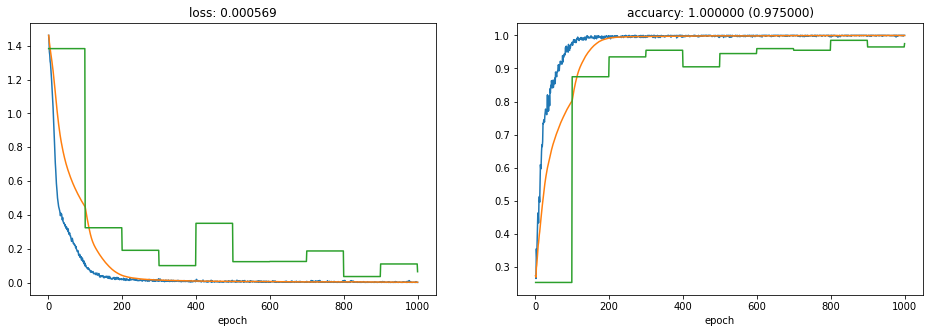

epoch:  2000 loss: 0.000158 accuracy: 1.000000 (0.960000)  40.23s

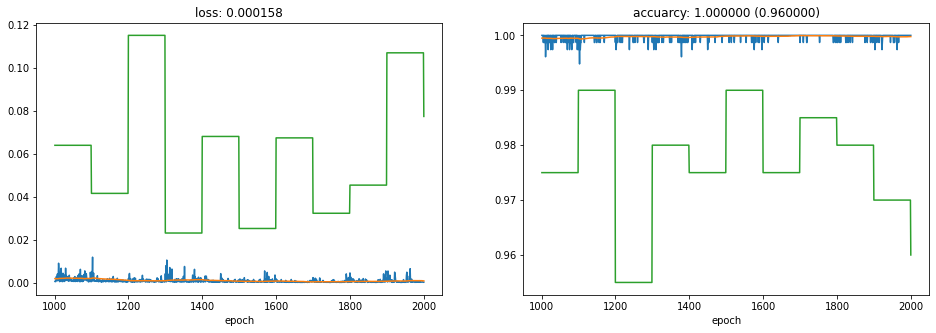

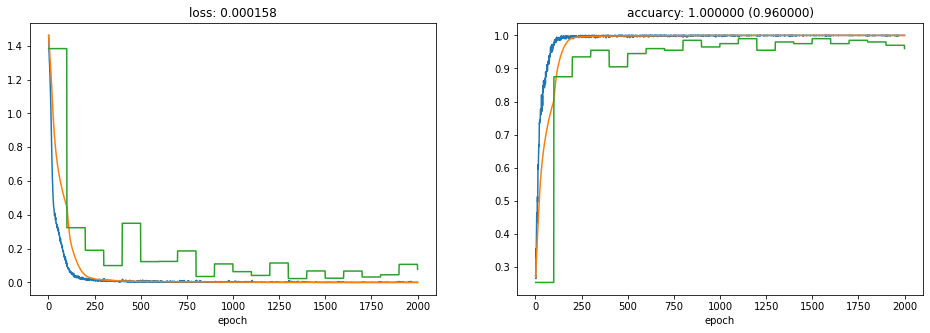

In [7]:
epochs = 2000

model.to(device) # just in case
L_tst, A_tst = fit(model, X_trn,Y_trn, train=False)
print( "before:      loss: %8.6f accuracy: %.6f" % (L_tst, A_tst)  )

history, losses, accs, beg = [], [], [], time.process_time()
for epoch in range(1, epochs+1):   
    
    L, A = fit(model, X_trn, Y_trn, batch_size=256)     # one epoch
    losses.append(L); accs.  append(A)    
      
    if epoch % 100 == 0 or epoch == epochs:              # learning output   
        L_tst, A_tst = fit(model, X_tst, Y_tst, batch_size=1000, train=False) 
        print(f"\repoch: {epoch:5d} loss: {L:8.6f} accuracy: {A:.6f} ({A_tst:.6f})  {time.process_time()-beg:.2f}s", end="")           
        beg = time.process_time()
        
    if epoch % 1 == 0:
        history.append([epoch, np.mean(losses[-1:]), np.mean(losses[-100:]), L_tst, np.mean(accs[-1:]), np.mean(accs[-100:]), A_tst])
        
    if epoch % 1000  == 0:
        plot_train(1000, L, A, A_tst)
                
plot_train(0, L, A, A_tst)

## Plot wrong tests

0.07737325876951218 0.9599999785423279
tensor([ 12,  24,  36, 104, 124, 140, 156, 184])


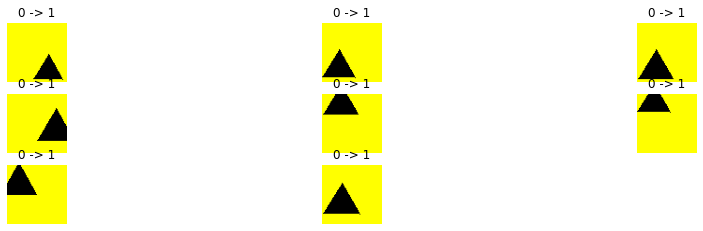

In [8]:
def get_wrong(model, X,Y, batch_size=100):                  
    model.train(False)                                 # important for Dropout, BatchNorm layers
    wrong   = torch.tensor([], dtype=torch.int64)
    classes = torch.tensor([], dtype=torch.int64)
    sumL, sumA, numB = 0, 0, len(X) // batch_size      # error, accuracy, batches    
    for i in range(0, numB*batch_size, batch_size):             
        last = i + batch_size if i < numB*batch_size - 1 else len(X)
        xb = X[i: last].to(device)                      # current batch                
        yb = Y[i: last].to(device) 
              
        y = model(xb)                                   # forward propagation         
        L = loss(y, yb) 

        sumL += L.item()                                # total loss (item from graph)
        
        a = y.argmax(axis=1)        
        sumA += (a == yb).float().mean().item()         # class definition accuracy
        
        classes = torch.cat([classes, a.cpu()])
        wrong   = torch.cat(  [wrong, i*batch_size + (a != yb).cpu().nonzero(as_tuple=True)[0] ]  ) 
        
    return sumL/numB,  sumA/numB, wrong, classes                  # mean loss, accuracy, errosrs

L, A, wrong, classes = get_wrong(model, X_tst,Y_tst, 200)
print(L,A)
print(wrong)

count = len(wrong)

plt.figure(figsize=(16, 5))         # plot the 20 mnist digits
for i in range(count):    
    plt.subplot(4, count // 4 + 1, i+1)    
    plt.title(f"{Y_tst[wrong[i].item()]} -> {classes[wrong[i].item()].item()}")
    plt.imshow(  X_tst[wrong[i].item()].permute(1,2,0).long().numpy()*255)
    plt.axis('off')
plt.show()    

## Confusion matrix

total accuracy: 0.96
classes accuracy: [0.84 1.   1.   1.  ]


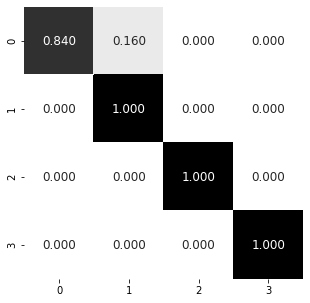

In [9]:
from   sklearn.metrics import confusion_matrix
import seaborn as sn

matrix = confusion_matrix(Y_tst.numpy(), classes.numpy() )

print("total accuracy:", matrix.diagonal().sum()/matrix.sum())
print("classes accuracy:", matrix.diagonal()/matrix.sum(axis=1))

matrix = matrix / matrix.sum(axis=1)
plt.figure(figsize = (5,5))
sn.heatmap(matrix, annot=True, cmap="Greys", annot_kws={"size": 12}, fmt=".3f", cbar=False)
plt.show()

<hr style="border: 1px black solid">

# Hyperparameters analysis

- Convolutional layers have few parameters. The main contribution to the quantity of parameters comes from the fully connected layer. The more cnn layers, the more times pooling is applied and the dimension of the fully connected layer decreases.

- Start by using smaller filters (captures details), and smaller channels (fewer features), then increase them.

- [A guide to an efficient way to build neural network architectures](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7)  !!!

## Without rotation
```
NUM_EXAMPLES = 1000
MAGE_SIZE    = (64, 64)                      # width and height of the image
SHAPE_SIZE   = (16, 24)                      # minimal and maximal size of pattern
ROTATE       = False

Adam(lr=0.001); batch_size=256; epochs = 3000
```

**NUM_CLASSES  = 4**
```
cnn(channels=[7, 21], conv_kernels=[3,3], conv_stride=1, pool_kernel=2, pool_stride=2, dropout = 0.25)
parameters: 18008

total accuracy: 1.0
classes accuracy: [1. 1. 1. 1.]
```

Two cnn layers are better than one.

```
cnn(channels=[21], conv_kernels=[3], conv_stride=1, pool_kernel=2, pool_stride=2, dropout = 0.25)
parameters: 81316

total accuracy: 0.935
classes accuracy: [0.96 0.96 0.96 0.86]
```

**NUM_CLASSES  = 8**

More classes - more features needed.

```
cnn(channels=[7, 21, 31], conv_kernels=[3,5,7], conv_stride=1, pool_kernel=2, pool_stride=2, dropout = 0.25)
parameters:  38062

total accuracy: 1.0
classes accuracy: [1. 1. 1. 1. 1. 1. 1. 1.]
```

``` 
cnn(channels=[7, 21], conv_kernels=[3,3], conv_stride=1, pool_kernel=2, pool_stride=2, dropout = 0.25)
parameters: 34476

total accuracy: 0.93
classes accuracy: [0.96 0.92 1.00 0.72 0.96 1.00 1.00 0.88]
```

## With rotation

```
ROTATE = True
```

You can achieve better results by increasing the number of examples to 5000. However, since the examples are quite uniform, it is hard to understand the network remembers them or actually learns better.

```
cnn(channels=[21, 31, 61], conv_kernels=[3, 5, 7], conv_stride=1, pool_kernel=2, pool_stride=2, dropout = 0.5)
total accuracy: 0.855
classes accuracy: [0.92 1.   0.96 0.96 0.76 0.68 0.76 0.8 ]

cnn(channels=[21, 31, 61], conv_kernels=[3, 5, 7], conv_stride=1, pool_kernel=2, pool_stride=2, dropout = 0.3)
parameters: 114014
total accuracy: 0.83
classes accuracy: [0.92 0.96 0.88 1.   0.76 0.64 0.64 0.84]

cnn(channels=[7, 21, 31], conv_kernels=[3, 5, 7], conv_stride=1, pool_kernel=2, pool_stride=2, dropout = 0.3)
total accuracy: 0.755
classes accuracy: [0.72 0.96 0.88 1.   0.68 0.56 0.6  0.64]

cnn(channels=[7, 21, 31], conv_kernels=[3, 5, 7], conv_stride=1, pool_kernel=2, pool_stride=2, dropout = 0.2)
parameters:  38062
total accuracy: 0.73
classes accuracy: [0.8  1.   0.68 1.   0.44 0.6  0.68 0.64]

cnn(channels=[7, 21, 31], conv_kernels=[3, 5, 7], conv_stride=1, pool_kernel=2, pool_stride=2, dropout = 0.1)
total accuracy: 0.66
classes accuracy: [0.8  1.   0.64 1.   0.44 0.36 0.44 0.6 ]

```

<hr style="border: 1px black solid">

# Classical architectures

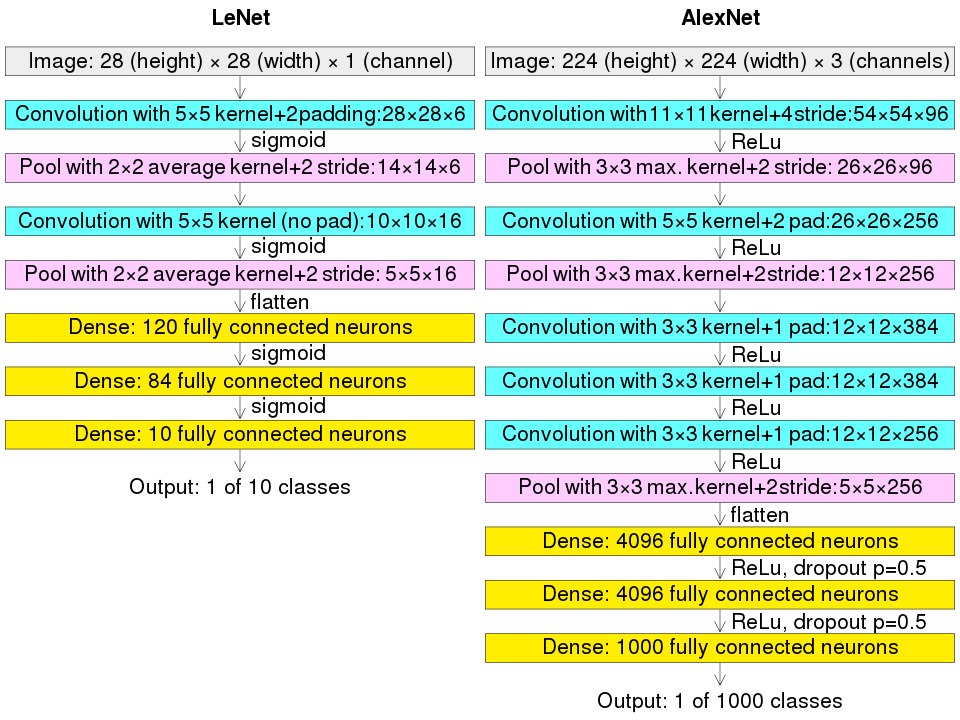

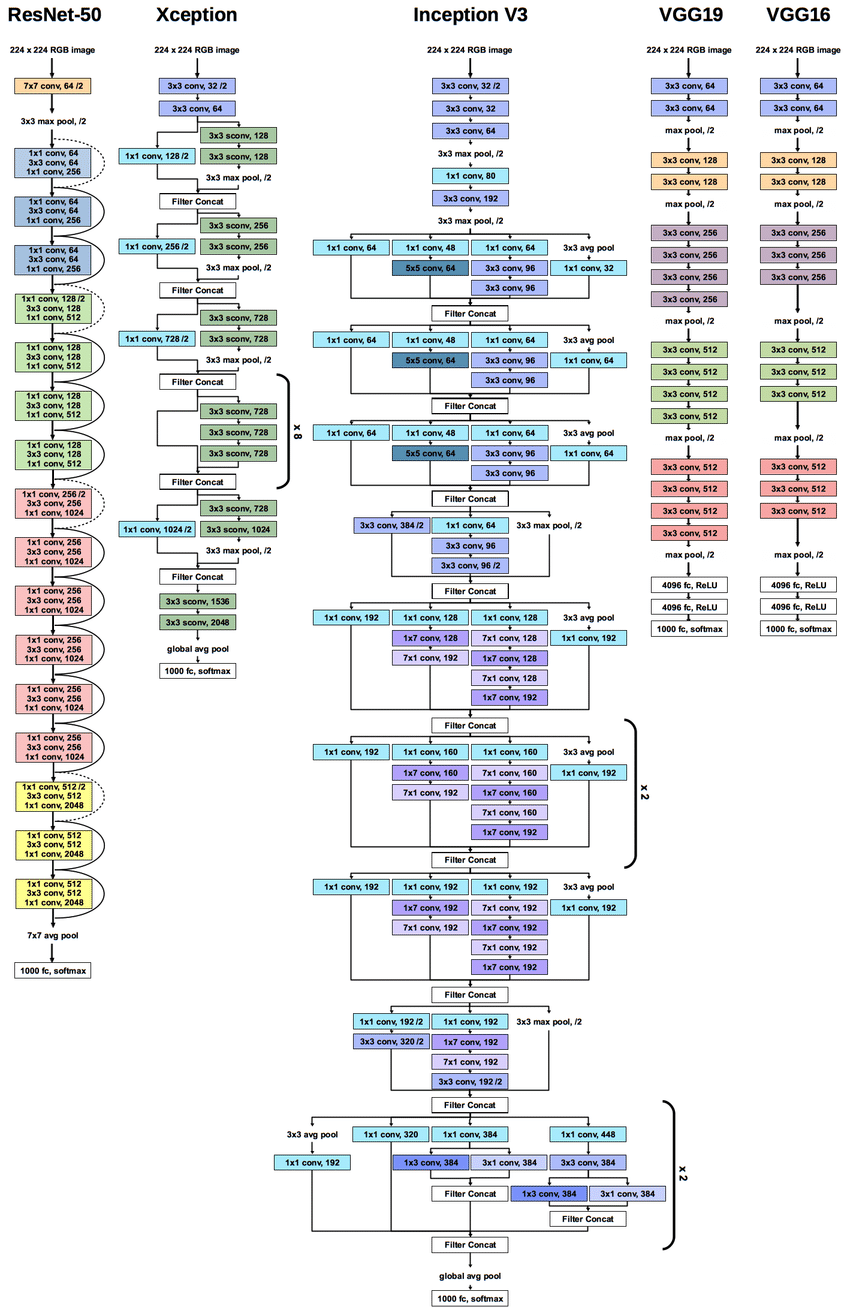